In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
ro = random.uniform(0.2, 0.8)
sigma1, sigma2 = random.uniform(0.5, 2), random.uniform(0.5, 2)
mu1, mu2 = random.uniform(-3, 3), random.uniform(-3, 3)
cov_matrix = [[sigma1*sigma1, ro*sigma1*sigma2], [ro*sigma1*sigma2, sigma2*sigma2]]
clusters = np.array([np.random.multivariate_normal([mu1, mu2], cov_matrix, random.randint(30, 40)) for i in range(4)])

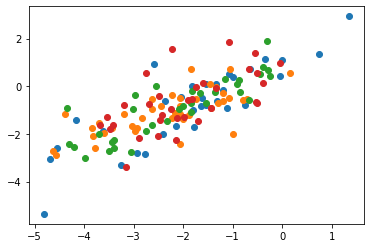

In [3]:
for cluster in clusters:
    points = [(point[0], point[1]) for point in cluster]
    x, y = zip(*points)
    plt.scatter(x, y)
plt.show()

In [4]:
def cartesian(l):
    return [[x, y] for x in l for y in l]

In [5]:
line = np.linspace(-5, 5, 41)

In [6]:
points = cartesian(line)

In [7]:
line2 = np.linspace(-5, 4.75, 14)
points2 = cartesian(line2)

In [8]:
len(points2)

196

In [9]:
def blend(prob, colors=[[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0.77, 0]]):
    blended = []
    for p in prob:
        r, g, b = 0, 0, 0
        for i in range(len(colors)):
            r, g, b = r+p[i]*colors[i][0], g+p[i]*colors[i][1], b+p[i]*colors[i][2]
        blended.append([r, g, b]) 
    return blended

In [11]:
X = []
y = []
for i, cluster in enumerate(clusters):
    X = X + [list(point) for point in cluster]
    y = y + [i for point in cluster]

In [12]:
models = [MLPClassifier(), GaussianNB(), KNeighborsClassifier(),RandomForestClassifier(), LogisticRegression()]

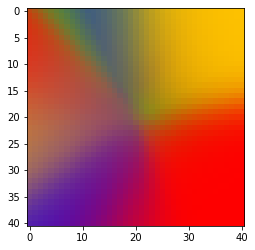

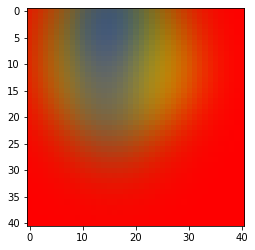

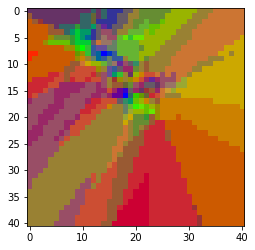

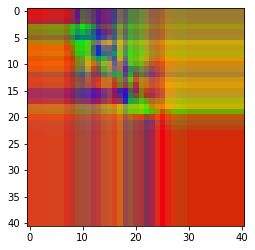

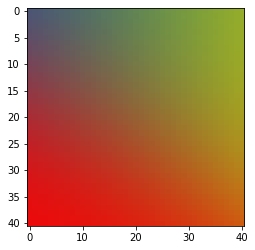

In [13]:
for model in models:
    model.fit(X, y)
    predictions = model.predict_proba(points)
    plt.imshow(np.reshape(blend(predictions), (41, 41, 3)));
    plt.show()

In [14]:
labels2 = MLPClassifier().fit(X, y).predict(points2)

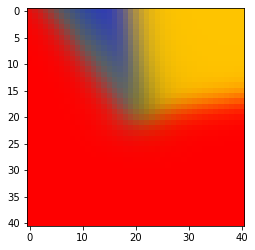

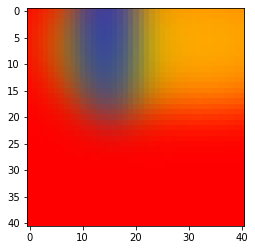

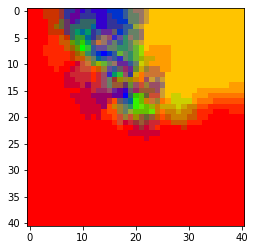

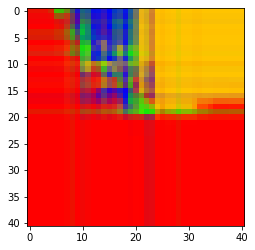

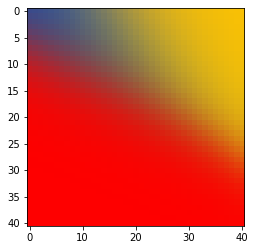

In [15]:
for model in models:
    model.fit(X+points2, y+list(labels2))
    predictions = model.predict_proba(points)
    plt.imshow(np.reshape(blend(predictions), (41, 41, 3)));
    plt.show()

In [16]:
from sklearn import datasets

iris = datasets.load_iris()

In [17]:
X=list(iris.data)

In [18]:
y=list(iris.target)

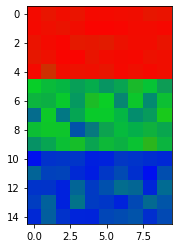

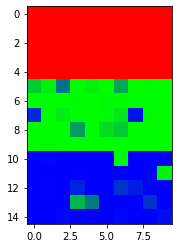

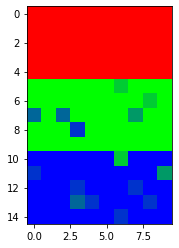

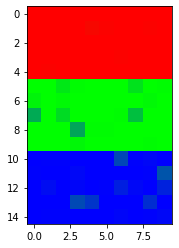

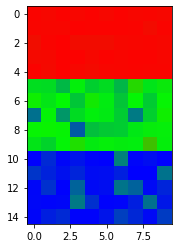

In [19]:
for model in models:
    model.fit(X, y)
    predictions = model.predict_proba(X)
    plt.imshow(np.reshape(blend(predictions, colors=[[1,0,0], [0, 1, 0], [0, 0, 1]]), (15, 10, 3)));
    plt.show()